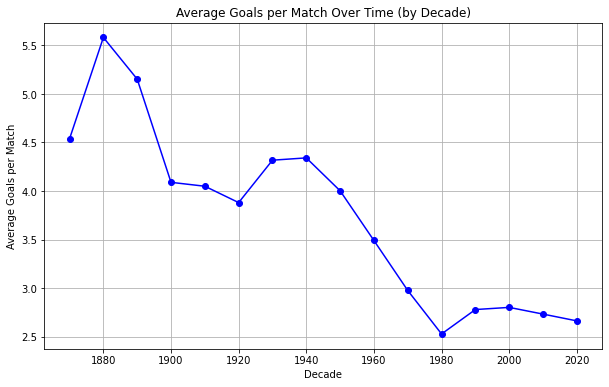

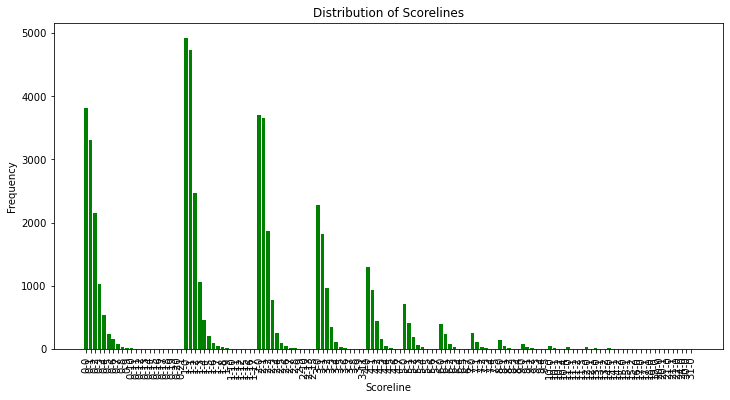

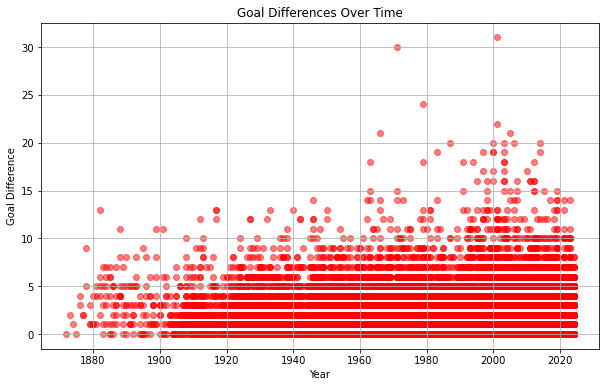

Average goals per match before 1970: 3.90
Average goals per match after 1970: 2.75


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
goalscorers_df = pd.read_csv('goalscorers.csv')
results_df = pd.read_csv('results.csv')
shootouts_df = pd.read_csv('shootouts.csv')

# Step 1: Calculate average goals per match for each era, competition, and team
def calculate_average_goals_per_match(results_df):
    # Create a 'total_goals' column (sum of home and away goals)
    results_df['total_goals'] = results_df['home_score'] + results_df['away_score']
    
    # Convert date to datetime and extract the year
    results_df['year'] = pd.to_datetime(results_df['date']).dt.year
    
    # Group by era (decade), tournament, and calculate average goals per match
    results_df['decade'] = (results_df['year'] // 10) * 10
    avg_goals_by_era = results_df.groupby('decade')['total_goals'].mean()
    avg_goals_by_tournament = results_df.groupby('tournament')['total_goals'].mean()
    avg_goals_by_team = results_df.groupby('home_team')['home_score'].mean()

    return avg_goals_by_era, avg_goals_by_tournament, avg_goals_by_team

avg_goals_by_era, avg_goals_by_tournament, avg_goals_by_team = calculate_average_goals_per_match(results_df)

# Step 2: Analyze the impact of rule changes (penalty shootouts) on goal-scoring
# Let's compare goal-scoring before and after 1970s (introduction of shootouts and modern offside rule)
def analyze_rule_changes(results_df):
    pre_1970 = results_df[results_df['year'] < 1970]
    post_1970 = results_df[results_df['year'] >= 1970]

    avg_goals_pre_1970 = pre_1970['total_goals'].mean()
    avg_goals_post_1970 = post_1970['total_goals'].mean()

    return avg_goals_pre_1970, avg_goals_post_1970

avg_goals_pre_1970, avg_goals_post_1970 = analyze_rule_changes(results_df)

# Step 3: Study how frequently matches are decided by large vs small goal margins over time
def analyze_goal_margins(results_df):
    # Calculate goal margins
    results_df['goal_margin'] = abs(results_df['home_score'] - results_df['away_score'])
    
    # Group goal margins by decades and study the distribution
    goal_margin_by_decade = results_df.groupby('decade')['goal_margin'].value_counts(normalize=True).unstack().fillna(0)
    
    return goal_margin_by_decade

goal_margin_by_decade = analyze_goal_margins(results_df)

# Step 4: Visualization

# 4.1 Time Series: Average goals per match over time (by decade)
def plot_avg_goals_per_era(avg_goals_by_era):
    plt.figure(figsize=(10, 6))
    avg_goals_by_era.plot(marker='o', color='blue')
    plt.title('Average Goals per Match Over Time (by Decade)')
    plt.xlabel('Decade')
    plt.ylabel('Average Goals per Match')
    plt.grid(True)
    plt.show()

# 4.2 Histogram: Scorelines distribution (e.g., 1-0, 2-1)
def plot_scoreline_histogram(results_df):
    scoreline_counts = results_df.groupby(['home_score', 'away_score']).size().reset_index(name='count')
    scoreline_counts['scoreline'] = scoreline_counts['home_score'].astype(str) + '-' + scoreline_counts['away_score'].astype(str)
    
    plt.figure(figsize=(12, 6))
    plt.bar(scoreline_counts['scoreline'], scoreline_counts['count'], color='green')
    plt.xticks(rotation=90)
    plt.title('Distribution of Scorelines')
    plt.xlabel('Scoreline')
    plt.ylabel('Frequency')
    plt.show()

# 4.3 Scatter Plot: Goal differences over time
def plot_goal_differences_over_time(results_df):
    plt.figure(figsize=(10, 6))
    plt.scatter(results_df['year'], results_df['goal_margin'], alpha=0.5, color='red')
    plt.title('Goal Differences Over Time')
    plt.xlabel('Year')
    plt.ylabel('Goal Difference')
    plt.grid(True)
    plt.show()

# Generate visualizations
plot_avg_goals_per_era(avg_goals_by_era)
plot_scoreline_histogram(results_df)
plot_goal_differences_over_time(results_df)

# Print some of the key findings
print(f'Average goals per match before 1970: {avg_goals_pre_1970:.2f}')
print(f'Average goals per match after 1970: {avg_goals_post_1970:.2f}')


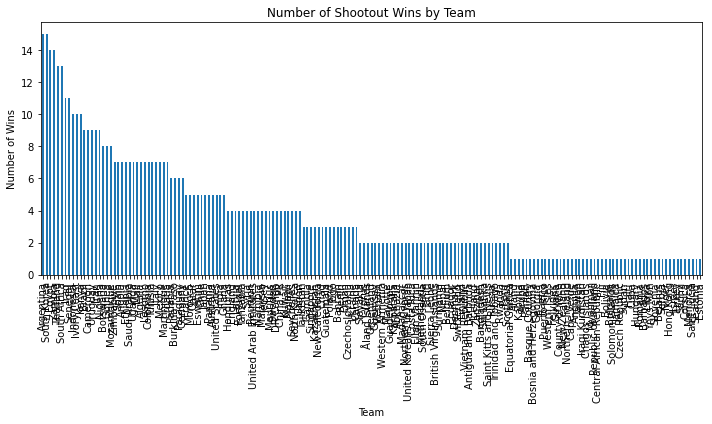

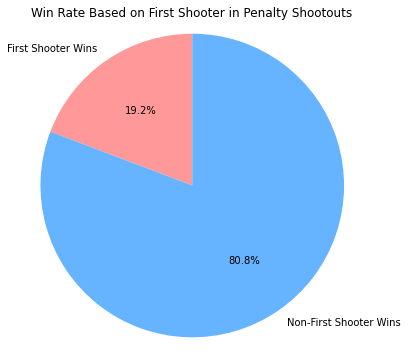

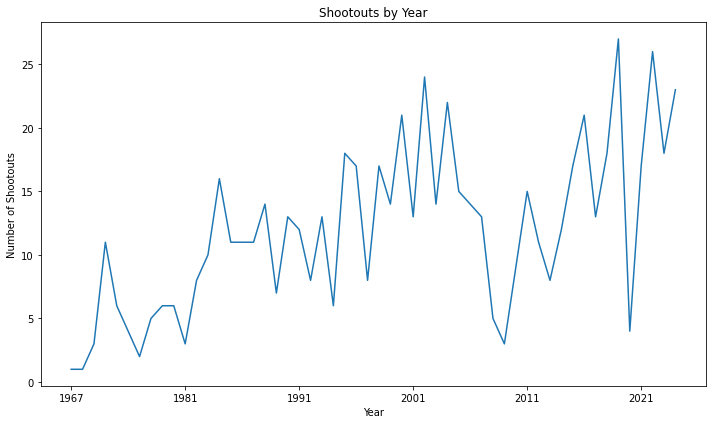

First shooter win rate: 19.22%
Non-first shooter win rate: 80.78%


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
shootouts_df = pd.read_csv('shootouts.csv')

# Step 1: Identify common winners in penalty shootouts
def get_common_shootout_winners(shootouts_df):
    winner_counts = shootouts_df['winner'].value_counts()
    return winner_counts

# Step 2: Explore if taking the first shot correlates with a higher chance of winning
def analyze_first_shot_advantage(shootouts_df):
    # Create a new column to check if the winner took the first shot
    shootouts_df['first_shot_win'] = (shootouts_df['winner'] == shootouts_df['first_shooter'])
    
    # Calculate the win rate for teams that took the first shot vs those that didn't
    first_shot_win_rate = shootouts_df['first_shot_win'].mean()
    non_first_shot_win_rate = 1 - first_shot_win_rate
    
    return first_shot_win_rate, non_first_shot_win_rate

# Step 3: Study patterns related to shootouts by year
def analyze_shootouts_by_year(shootouts_df):
    # Group by year and count the number of shootouts
    shootouts_by_year = shootouts_df.groupby(shootouts_df['date'].str[:4])['winner'].count()  # Extract year from date
    return shootouts_by_year

# Step 4: Visualizations
def plot_shootout_winners_bar_chart(winner_counts):
    # Bar chart for the number of shootout wins by team
    winner_counts.plot(kind='bar', figsize=(10, 6))
    plt.title('Number of Shootout Wins by Team')
    plt.xlabel('Team')
    plt.ylabel('Number of Wins')
    plt.tight_layout()
    plt.show()

def plot_first_shot_win_rate_pie_chart(first_shot_win_rate, non_first_shot_win_rate):
    # Pie chart for first shot win rate
    labels = ['First Shooter Wins', 'Non-First Shooter Wins']
    sizes = [first_shot_win_rate, non_first_shot_win_rate]
    colors = ['#ff9999','#66b3ff']
    
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Win Rate Based on First Shooter in Penalty Shootouts')
    plt.show()

def plot_shootouts_by_year(shootouts_by_year):
    # Line chart for shootouts by year
    shootouts_by_year.plot(kind='line', figsize=(10, 6))
    plt.title('Shootouts by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Shootouts')
    plt.tight_layout()
    plt.show()

# Step 5: Execute the analysis
winner_counts = get_common_shootout_winners(shootouts_df)
first_shot_win_rate, non_first_shot_win_rate = analyze_first_shot_advantage(shootouts_df)
shootouts_by_year = analyze_shootouts_by_year(shootouts_df)

# Visualize the results
plot_shootout_winners_bar_chart(winner_counts)
plot_first_shot_win_rate_pie_chart(first_shot_win_rate, non_first_shot_win_rate)
plot_shootouts_by_year(shootouts_by_year)

# Print win rates
print(f"First shooter win rate: {first_shot_win_rate * 100:.2f}%")
print(f"Non-first shooter win rate: {non_first_shot_win_rate * 100:.2f}%")


Accuracy: 53.34%
              precision    recall  f1-score   support

           0       0.51      0.38      0.43      2653
           1       0.24      0.04      0.06      2218
           2       0.55      0.86      0.67      4649

    accuracy                           0.53      9520
   macro avg       0.43      0.42      0.39      9520
weighted avg       0.47      0.53      0.46      9520



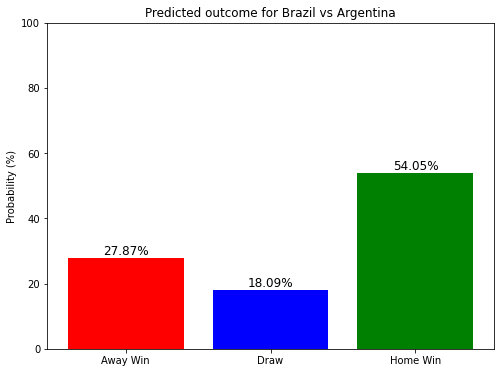

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the dataset
matches_df = pd.read_csv('results.csv')

# Step 1: Data Preparation
# Filter the columns to focus on the relevant information
matches_df = matches_df[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament']]

# Create a result column: 2 for home win, 0 for away win, 1 for draw
def match_result(row):
    if row['home_score'] > row['away_score']:
        return 2  # Home win
    elif row['home_score'] < row['away_score']:
        return 0  # Away win
    else:
        return 1  # Draw

matches_df['result'] = matches_df.apply(match_result, axis=1)

# Step 2: Feature Engineering
# Convert categorical columns to numeric using LabelEncoder
le_team = LabelEncoder()
matches_df['home_team_encoded'] = le_team.fit_transform(matches_df['home_team'])
matches_df['away_team_encoded'] = le_team.fit_transform(matches_df['away_team'])

# Feature columns (home team, away team, and other match-related info)
X = matches_df[['home_team_encoded', 'away_team_encoded']]

# Target column (match result)
y = matches_df['result']

# Step 3: Model Training (XGBoost)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use an XGBoost model to predict the result
model = xgb.XGBClassifier(objective='multi:softprob', num_class=3)
model.fit(X_train, y_train)

# Predict on the test data and evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Step 4: Function to Predict the Outcome for Two Teams with Visualization
def predict_match_outcome(team1, team2, model, le_team):
    # Encode the input teams
    team1_encoded = le_team.transform([team1])[0]
    team2_encoded = le_team.transform([team2])[0]

    # Create the input for the model
    match_input = np.array([[team1_encoded, team2_encoded]])

    # Predict probabilities for each outcome
    probs = model.predict_proba(match_input)[0]

    # Define the outcomes and corresponding probabilities
    outcomes = ['Away Win', 'Draw', 'Home Win']
    percentages = [probs[0] * 100, probs[1] * 100, probs[2] * 100]

    # Create a bar chart for the probabilities
    plt.figure(figsize=(8, 6))
    plt.bar(outcomes, percentages, color=['red', 'blue', 'green'])
    plt.title(f"Predicted outcome for {team1} vs {team2}")
    plt.ylabel('Probability (%)')
    plt.ylim(0, 100)

    # Add percentage labels on the bars
    for i, v in enumerate(percentages):
        plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)

    # Show the plot
    plt.show()

# Example Usage: Predict outcome for Brazil vs Argentina
team1 = "Brazil"
team2 = "Argentina"
predict_match_outcome(team1, team2, model, le_team)
